In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
def get_titles_filtered_by_milestones() :
    titles = {"tape": [], "vinyl": [], "kassette": [], "cd": [], "mp3": []}

    stats = pd.read_pickle(r'1m-highest.pkl')

    for data in stats:
        try:                        
            if data["year"] < 1926:
                continue
            elif data["year"] < 1947:
                titles["tape"].append(data)
            elif data["year"] < 1967:
                titles["vinyl"].append(data)
            elif data["year"] < 1981:
                titles["kassette"].append(data)
            elif data["year"] < 1989:
                titles["cd"].append(data)
            else: 
                titles["mp3"].append(data)
            
        except AttributeError:
            print(data)

    return titles

In [3]:
titles = get_titles_filtered_by_milestones()


In [4]:
df_tape = pd.DataFrame(titles['tape'])
df_vinyl = pd.DataFrame(titles['vinyl'])
df_kassette = pd.DataFrame(titles['kassette'])
df_cd = pd.DataFrame(titles['cd'])
df_mp3 = pd.DataFrame(titles['mp3'])

df_list = [df_tape, df_vinyl, df_kassette, df_cd, df_mp3]


In [5]:
# filter 0, NaN values from tempo data

for frame in df_list:
    frame.tempo = frame.tempo[frame.tempo > 0]
    frame.dropna(inplace=True)
    
print(frame.tempo.isna().sum())
    

0


In [6]:
combinedDf = pd.concat(df_list)

combinedDf.describe()

,tempo,key,year,duration,loudness
count,514217.000000,514217.000000,514217.000000,514217.000000,514217.000000
mean,125.110914,5.314663,1998.390388,246.699462,-9.690906
std,34.330511,3.600638,10.928091,114.347955,4.928806
min,7.604000,0.000000,1926.000000,1.227300,-57.004000
25%,99.144000,2.000000,1994.000000,183.196280,-12.169000
50%,122.625000,5.000000,2002.000000,229.929340,-8.609000
75%,145.402000,9.000000,2006.000000,286.954650,-6.125000
max,280.955000,11.000000,2011.000000,3024.665670,4.150000


In [7]:
# Properties of Tape-Data
print(min(df_tape.tempo))
df_tape.describe()

38.443


,tempo,key,year,duration,loudness
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,107.304622,5.131498,1934.879205,182.995769,-18.039523
std,29.942206,3.500753,6.180225,28.274483,4.577282
min,38.443000,0.000000,1926.000000,15.098320,-37.562000
25%,86.510000,2.000000,1929.000000,168.939953,-20.376250
50%,100.197000,5.000000,1934.500000,180.871385,-17.251500
75%,119.642750,8.000000,1940.000000,192.489340,-15.048250
max,253.253000,11.000000,1946.000000,394.997100,-5.327000


In [8]:
# Properties of vinyl-Data
df_vinyl.describe()

,tempo,key,year,duration,loudness
count,9203.000000,9203.00000,9203.000000,9203.000000,9203.000000
mean,117.187116,5.04868,1961.003151,194.144582,-13.333851
std,34.312969,3.48481,4.323162,108.779479,4.846042
min,21.225000,0.00000,1947.000000,2.063220,-40.456000
25%,93.412000,2.00000,1958.000000,143.411790,-16.109000
50%,113.926000,5.00000,1962.000000,165.067300,-12.787000
75%,137.275500,8.00000,1965.000000,196.414240,-9.967000
max,254.028000,11.00000,1966.000000,1781.446080,-1.402000


In [9]:
# Properties of kassette-Data
df_kassette.describe()

,tempo,key,year,duration,loudness
count,33627.000000,33627.000000,33627.000000,33627.000000,33627.000000
mean,125.425404,5.163856,1974.087816,242.074662,-11.804372
std,33.330672,3.554268,4.023978,123.369136,4.268006
min,22.628000,0.000000,1967.000000,2.063220,-40.726000
25%,100.946000,2.000000,1971.000000,173.191380,-14.057000
50%,122.379000,5.000000,1974.000000,214.569340,-11.355000
75%,145.321500,9.000000,1978.000000,276.375060,-8.806000
max,260.547000,11.000000,1980.000000,2723.970160,2.067000


In [10]:
# Properties of kassette-Data
df_cd.describe()

,tempo,key,year,duration,loudness
count,32027.000000,32027.000000,32027.000000,32027.000000,32027.000000
mean,127.108987,5.323383,1984.928623,241.263435,-11.460092
std,32.784285,3.615591,2.336403,102.174421,4.684875
min,10.768000,0.000000,1981.000000,2.010980,-54.477000
25%,104.506000,2.000000,1983.000000,183.222400,-13.845000
50%,123.825000,5.000000,1985.000000,229.798730,-10.993000
75%,145.837500,9.000000,1987.000000,281.273015,-8.118000
max,280.955000,11.000000,1988.000000,1959.000360,-1.218000


In [11]:
# Properties of kassette-Data
df_mp3.describe()

,tempo,key,year,duration,loudness
count,438706.000000,438706.000000,438706.000000,438706.000000,438706.000000
mean,125.133709,5.331438,2002.114918,248.648244,-9.310886
std,34.492194,3.605132,5.493764,114.351963,4.884128
min,7.604000,0.000000,1989.000000,1.227300,-57.004000
25%,98.875000,2.000000,1998.000000,186.252610,-11.574000
50%,122.825000,6.000000,2003.000000,232.384850,-8.132000
75%,145.614000,9.000000,2007.000000,289.122810,-5.861000
max,275.393000,11.000000,2011.000000,3024.665670,4.150000


In [12]:
print(df_tape.columns.tolist())
print(df_tape.values.tolist()[0])

['tempo', 'artist_name', 'track_name', 'key', 'year', 'duration', 'loudness']
[101.501, 'Peetie Wheatstraw', 'Shack Bully Stomp', 9, 1938, 159.84281, -19.519]


In [13]:
# get size of arrays (tempo value)
print("tape: " + str(df_tape.tempo.size))
print("vinyl: " + str(df_vinyl.tempo.size))
print("kassette: " + str(df_kassette.tempo.size))
print("cd: " + str(df_cd.tempo.size))
print("mp3: " + str(df_mp3.tempo.size))

tape: 654
vinyl: 9203
kassette: 33627
cd: 32027
mp3: 438706


In [14]:
def showViolinPlot(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.violinplot(data, showmeans=True, showmedians=True)
    plt.show()

In [15]:
def showHistogram(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    ax.hist(data, bins=int(max(data)-min(data)))
    plt.show()

In [16]:
def create_line_histogram(data, binFactor):

    density = stats.gaussian_kde(data)
    n, x, _ = plt.hist(data, bins=np.linspace(int(min(data)), int(max(data)), int((max(data)-min(data)) / binFactor)), histtype=u'stepfilled', density=True)
    plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1, label='mean')  
    plt.axvline(data.median(), color='black', linestyle='dashed', linewidth=1, label='median')  
    return plt.plot(x, density(x), color='black', linewidth=2)

In [17]:
def remove_outliers(data):
    return data[data.between(data.quantile(.15), data.quantile(.85))]

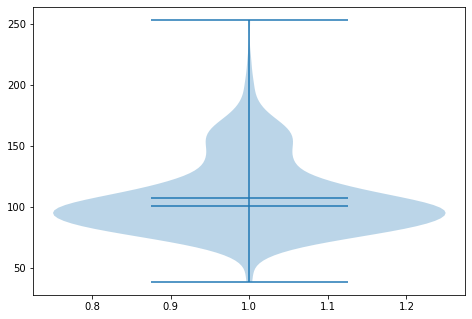

In [18]:
showViolinPlot(df_tape['tempo'])

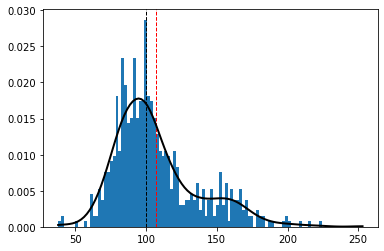

In [19]:
create_line_histogram(df_tape['tempo'], 2)
plt.show()

In [20]:
def create_stacked_histograms(property, binFactor, unit=''):

    fig = plt.figure()

    fig.suptitle(str(property).capitalize() + ' histograms')
    fig.supxlabel(str(property).capitalize() + (' [' + unit + ']' if unit else ''))
    fig.supylabel('Density')
    fig.set_size_inches(10, 10)

    ax1 = plt.subplot(511)
    plt.title('Tape')
    create_line_histogram(df_tape[property], binFactor)
    plt.legend(loc='upper right')

    plt.subplot(512, sharex=ax1)
    plt.title('Vinyl')
    create_line_histogram(df_vinyl[property], binFactor)

    plt.subplot(513, sharex=ax1)
    plt.title('Kassette')
    create_line_histogram(df_kassette[property], binFactor)

    plt.subplot(514, sharex=ax1)
    plt.title('CD')
    create_line_histogram(df_cd[property], binFactor)

    plt.subplot(515, sharex=ax1)
    plt.title('MP3')
    create_line_histogram(df_mp3[property], binFactor)

    fig.subplots_adjust(hspace=0.7)

    plt.show()

In [21]:
def create_stacked_histograms_no_outliers(property, binFactor, unit=''):

    fig = plt.figure()

    fig.suptitle(str(property).capitalize() + ' histograms without outliers')
    fig.supxlabel(str(property).capitalize() + (' [' + unit + ']' if unit else ''))
    fig.supylabel('Density')
    fig.set_size_inches(10, 10)

    ax1 = plt.subplot(511)
    plt.title('Tape')
    create_line_histogram(remove_outliers(df_tape[property]), binFactor)
    plt.legend(loc='upper right')

    
    plt.subplot(512, sharex=ax1)
    plt.title('Vinyl')
    create_line_histogram(remove_outliers(df_vinyl[property]), binFactor)

    plt.subplot(513, sharex=ax1)
    plt.title('Kassette')
    create_line_histogram(remove_outliers(df_kassette[property]), binFactor)

    plt.subplot(514, sharex=ax1)
    plt.title('CD')
    create_line_histogram(remove_outliers(df_cd[property]), binFactor)

    plt.subplot(515, sharex=ax1)
    plt.title('MP3')
    create_line_histogram(remove_outliers(df_mp3[property]), binFactor)

    fig.subplots_adjust(hspace=0.7)

    plt.show()

In [22]:
def get_min_values(frame, attr):
    return frame.loc[frame[attr] == min(frame[attr])]

In [23]:
def get_max_values(frame, attr):
    return frame.loc[frame[attr] == max(frame[attr])]

# Tempo

In [24]:
# min tempo values

for frame in df_list:
    res = get_min_values(frame, 'tempo')
    print(f"{res.artist_name.values[0]} - {res.track_name.values[0]} ({res.year.values[0]}), BPM: {int(res.tempo.values[0])}, duration: {int(res.duration.values[0])}s, loudness: {int(res.loudness.values[0])} LUFS")


Red Foley - Old Shep (1936), BPM: 38, duration: 192s, loudness: -10 LUFS
Mrs. Sarah Makem - In The Month Of January (1955), BPM: 21, duration: 305s, loudness: -13 LUFS
David Darling - Solo Cello And Voice (1980), BPM: 22, duration: 177s, loudness: -20 LUFS
Napalm Death - Prison Without Walls (1987), BPM: 10, duration: 34s, loudness: -5 LUFS
Jenny Piccolo - Bore Dome (2003), BPM: 7, duration: 26s, loudness: -9 LUFS


In [25]:
# max tempo values

for frame in df_list:
    res = get_max_values(frame, 'tempo')
    print(f"{res.artist_name.values[0]} - {res.track_name.values[0]} ({res.year.values[0]}), BPM: {int(res.tempo.values[0])}, duration: {int(res.duration.values[0])}s, loudness: {int(res.loudness.values[0])} LUFS")

Tampa Red - You Don't Want Me Blues (1934), BPM: 253, duration: 174s, loudness: -17 LUFS
Bill Cosby - My Pet Rhinoceros ( LP Version ) (1964), BPM: 254, duration: 45s, loudness: -19 LUFS
Frankie Valli - To Give [The Reason I Live] (1968), BPM: 260, duration: 202s, loudness: -8 LUFS
Saxon - Northern Lady (1986), BPM: 280, duration: 282s, loudness: -10 LUFS
Brian Bromberg - Yes Or No (1991), BPM: 275, duration: 431s, loudness: -9 LUFS


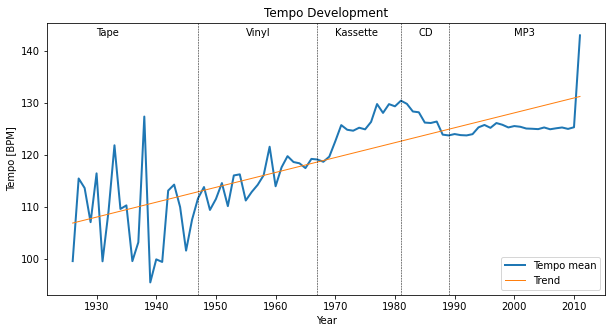

In [26]:
tempoDf = combinedDf[['year', 'tempo']].copy()
tempoDf.set_index('year', inplace=True)
tempoDf = tempoDf.groupby(tempoDf.index).aggregate('mean')

plt.figure(figsize=(10,5))
plt.plot(tempoDf.index, tempoDf.tempo, linewidth=2)
m, b = np.polyfit(tempoDf.index, tempoDf.tempo, 1)
plt.plot(tempoDf.index, m*tempoDf.index+b, linewidth=1)
plt.xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

y_height_labels = 143
plt.text(x=1930, y = y_height_labels, s='Tape')
plt.axvline(x=1947, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1955, y = y_height_labels, s='Vinyl')
plt.axvline(x=1967, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1970, y = y_height_labels, s='Kassette')
plt.axvline(x=1981, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1984, y = y_height_labels, s='CD')
plt.axvline(x=1989, color='black', linestyle='--', linewidth=0.5)
plt.text(x=2000, y = y_height_labels, s='MP3')

plt.title('Tempo Development')
plt.xlabel('Year')
plt.ylabel('Tempo [BPM]')
plt.legend(['Tempo mean', 'Trend'], loc='lower right')
plt.show()

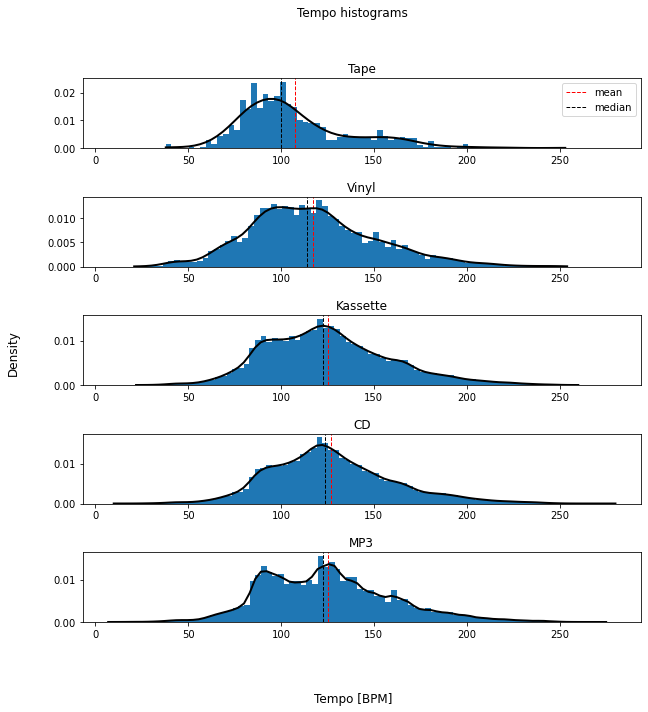

In [27]:
create_stacked_histograms('tempo', 3, 'BPM')

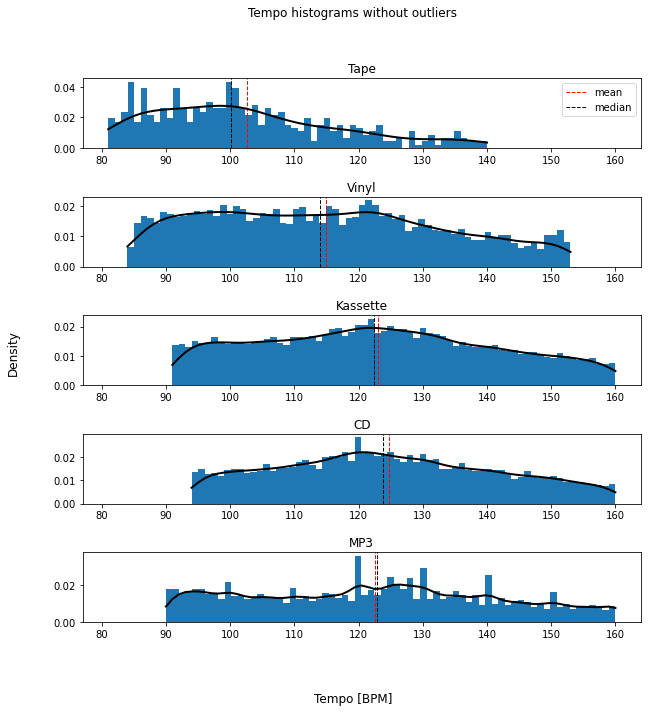

In [28]:
create_stacked_histograms_no_outliers('tempo', 1, 'BPM')

# Duration

In [29]:
# min values

for frame in df_list:
    res = get_min_values(frame, 'duration')
    print(f"{res.artist_name.values[0]} - {res.track_name.values[0]} ({res.year.values[0]}), BPM: {int(res.tempo.values[0])}, duration: {int(res.duration.values[0])}s, loudness: {int(res.loudness.values[0])} LUFS")


Bukka White - Parchman Farm Blues (1940), BPM: 78, duration: 15s, loudness: -12 LUFS
The Cleftones - Little Girl of Mine (1961), BPM: 196, duration: 2s, loudness: -11 LUFS
Ultimate Spinach - FRAGMENTARY MARCH OF GREEN (1968), BPM: 194, duration: 2s, loudness: -11 LUFS
Glenn Miller - Caribbean Clipper (1986), BPM: 108, duration: 2s, loudness: -13 LUFS
Bo Carter - Pig Meat Is What I Crave (1994), BPM: 192, duration: 1s, loudness: -13 LUFS


In [30]:
# max values

for frame in df_list:
    res = get_max_values(frame, 'duration')
    print(f"{res.artist_name.values[0]} - {res.track_name.values[0]} ({res.year.values[0]}), BPM: {int(res.tempo.values[0])}, duration: {int(res.duration.values[0])}s, loudness: {int(res.loudness.values[0])} LUFS")

Duke Ellington & His Orchestra - The Mooche (1928), BPM: 78, duration: 394s, loudness: -12 LUFS
Charles Mingus - Fables Of Faubus (1959), BPM: 97, duration: 1781s, loudness: -16 LUFS
Alvin Lucier - I Am Sitting In A Room (1970), BPM: 54, duration: 2723s, loudness: -31 LUFS
David Sylvian - The Beekeeper's Apprentice (1986), BPM: 90, duration: 1959s, loudness: -25 LUFS
Monolithe - Monolithe II (2005), BPM: 100, duration: 3024s, loudness: -6 LUFS


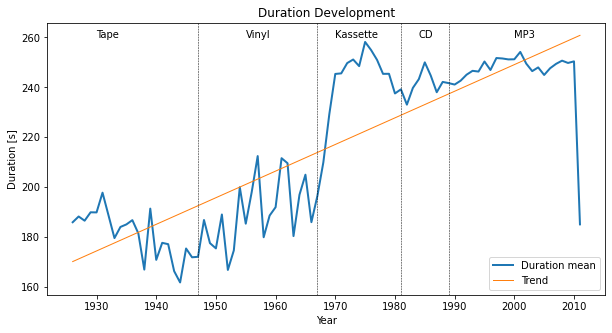

In [31]:
durationDf = combinedDf[['year', 'duration']].copy()
durationDf.set_index('year', inplace=True)
durationDf = durationDf.groupby(durationDf.index).aggregate('mean')

plt.figure(figsize=(10,5))
plt.plot(durationDf.index, durationDf.duration, linewidth=2)
m, b = np.polyfit(durationDf.index, durationDf.duration, 1)
plt.plot(durationDf.index, m*durationDf.index+b, linewidth=1)
plt.xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

y_height_labels = 260
plt.text(x=1930, y = y_height_labels, s='Tape')
plt.axvline(x=1947, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1955, y = y_height_labels, s='Vinyl')
plt.axvline(x=1967, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1970, y = y_height_labels, s='Kassette')
plt.axvline(x=1981, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1984, y = y_height_labels, s='CD')
plt.axvline(x=1989, color='black', linestyle='--', linewidth=0.5)
plt.text(x=2000, y = y_height_labels, s='MP3')

plt.title('Duration Development')
plt.xlabel('Year')
plt.ylabel('Duration [s]')
plt.legend(['Duration mean', 'Trend'], loc='lower right')
plt.show()

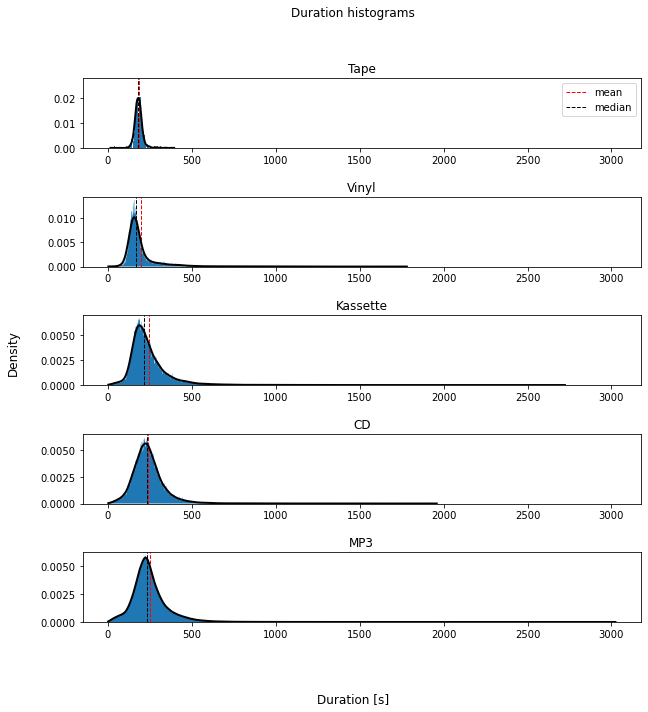

In [32]:
create_stacked_histograms('duration', 2, 's')

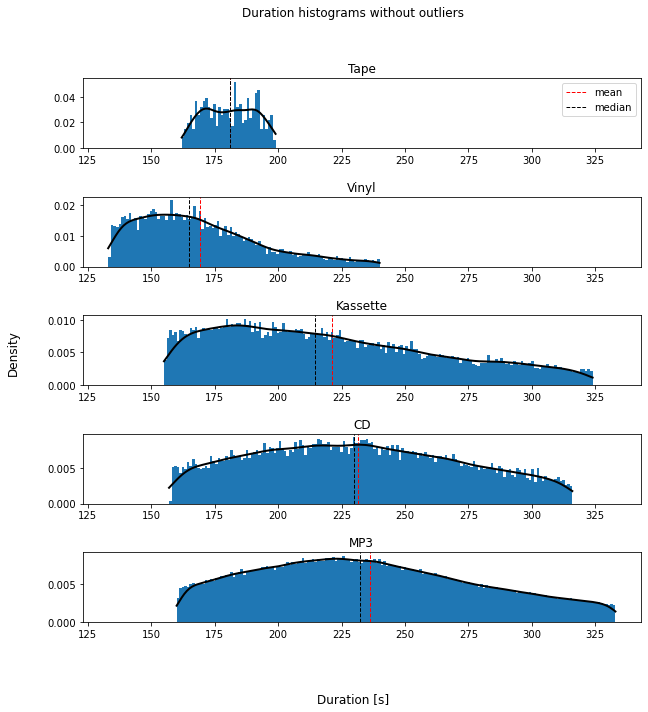

In [33]:
create_stacked_histograms_no_outliers('duration', 1, 's')

# Loudness

In [34]:
# min values

for frame in df_list:
    res = get_min_values(frame, 'loudness')
    print(f"{res.artist_name.values[0]} - {res.track_name.values[0]} ({res.year.values[0]}), BPM: {int(res.tempo.values[0])}, duration: {int(res.duration.values[0])}s, loudness: {int(res.loudness.values[0])} LUFS")


Furry Lewis - Kassie Jones (Part 2) (1928), BPM: 106, duration: 180s, loudness: -37 LUFS
Woody Guthrie - Pretty Boy Floyd (1964), BPM: 177, duration: 183s, loudness: -40 LUFS
Quatermass - Entropy (1970), BPM: 50, duration: 71s, loudness: -40 LUFS
Ciccone Youth - (Silence) (1988), BPM: 166, duration: 63s, loudness: -54 LUFS
Yearning - Bonus (2001), BPM: 132, duration: 11s, loudness: -57 LUFS


In [35]:
# max values

for frame in df_list:
    res = get_max_values(frame, 'loudness')
    print(f"{res.artist_name.values[0]} - {res.track_name.values[0]} ({res.year.values[0]}), BPM: {int(res.tempo.values[0])}, duration: {int(res.duration.values[0])}s, loudness: {int(res.loudness.values[0])} LUFS")

Louis Jordan & His Tympany Five - Ain't Nobody Here But Us Chickens (1946), BPM: 151, duration: 183s, loudness: -5 LUFS
The Supremes - When The Lovelight Starts Shining Through His Eyes (1963), BPM: 92, duration: 185s, loudness: -1 LUFS
Iggy & The Stooges - Your Pretty Face Is Going To Hell (1973), BPM: 156, duration: 294s, loudness: 2 LUFS
Jimmy Barnes - Seven Days (1987), BPM: 129, duration: 284s, loudness: -1 LUFS
Venetian Snares + Speedranch - Meta Abuse (2001), BPM: 90, duration: 244s, loudness: 4 LUFS


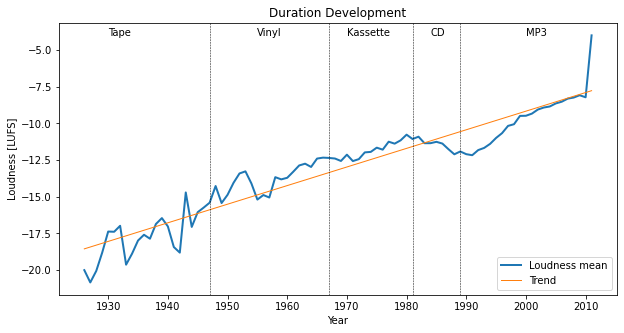

In [36]:
loudnessDf = combinedDf[['year', 'loudness']].copy()
loudnessDf.set_index('year', inplace=True)
loudnessDf = loudnessDf.groupby(loudnessDf.index).aggregate('mean')

plt.figure(figsize=(10,5))
plt.plot(loudnessDf.index, loudnessDf.loudness, linewidth=2)
m, b = np.polyfit(loudnessDf.index, loudnessDf.loudness, 1)
plt.plot(loudnessDf.index, m*loudnessDf.index+b, linewidth=1)
plt.xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

y_height_labels = -4
plt.text(x=1930, y = y_height_labels, s='Tape')
plt.axvline(x=1947, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1955, y = y_height_labels, s='Vinyl')
plt.axvline(x=1967, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1970, y = y_height_labels, s='Kassette')
plt.axvline(x=1981, color='black', linestyle='--', linewidth=0.5)
plt.text(x=1984, y = y_height_labels, s='CD')
plt.axvline(x=1989, color='black', linestyle='--', linewidth=0.5)
plt.text(x=2000, y = y_height_labels, s='MP3')

plt.title('Duration Development')
plt.xlabel('Year')
plt.ylabel('Loudness [LUFS]')
plt.legend(['Loudness mean', 'Trend'], loc='lower right')
plt.show()

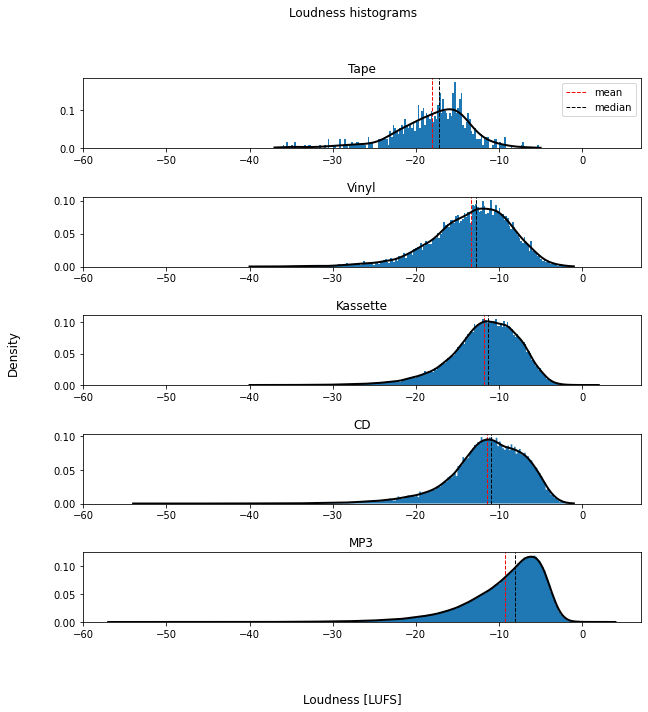

In [37]:
create_stacked_histograms('loudness', 0.2, 'LUFS')

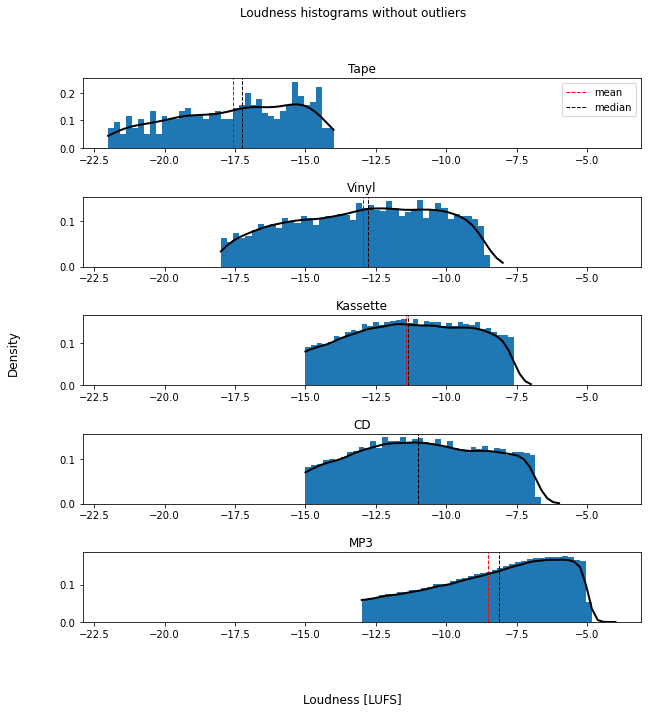

In [38]:
create_stacked_histograms_no_outliers('loudness', 0.2, 'LUFS')